# Ergodicity and Density Dynamics simulations

The parameters are saved in the file `parameters.jl`. Let's start by importing the module `ThermostattedDynamics`

In [1]:
include("../src/ThermostattedDynamics.jl")

ThermostattedDynamics

In [2]:
using ThermostattedDynamics

Let's import the parameters file

In [3]:
include("parameters.jl")

ThermostattedDynamics.Integrator{ODE.#ode4}("RK4",ODE.ode4)

And codify them in the predefined type Parameters

In [4]:
parameters = Parameters(T, Q, dtsampling, dt, nsimulations, nsteps, thermo, potential, integrator)

ThermostattedDynamics.Parameters(1.0,0.1,0.0125,0.0025,50,50000,ThermostattedDynamics.Thermostat{##1#2}("logistic",#1),ThermostattedDynamics.Potential{##3#4}("quartic",#3),ThermostattedDynamics.Integrator{ODE.#ode4}("RK4",ODE.ode4))

You may change the parameters from here. For instance, let's change the integrator from a Runge Kutta RK4 with fixed stepsize to an adaptative RK45 (the integrator, for the moment, must be supported in the package [ODE.jl](https://github.com/JuliaDiffEq/ODE.jl)

In [5]:
parameters.integrator

ThermostattedDynamics.Integrator{ODE.#ode4}("RK4",ODE.ode4)

In [6]:
parameters.integrator = Integrator("RK45", ode45)

ThermostattedDynamics.Integrator{ODE.#ode45_dp}("RK45",ODE.ode45_dp)

We are ready to calculate the Lyapunov Spectrum for `nsimulations` initial conditions

In [7]:
parameters.nsimulations

50

And let's compute the lyapunov exponents by calling the function `lyapunov_exponents`

Now, let's integrate an initial random condition for a total time equal to `nsteps*dt*nsimulations` by calling the function `trajectory`. The parameter `nsimulations` indicates how many parts of the trajectory are generated. Each part contains a segment of length `nsteps*dt`

In [8]:
trajec = trajectory(parameters)

Part 1 done
Part 2 done
Part 3 done
Part 4 done
Part 5 done
Part 6 done
Part 7 done
Part 8 done
Part 9 done
Part 10 done
Part 11 done
Part 12 done
Part 13 done
Part 14 done
Part 15 done
Part 16 done
Part 17 done
Part 18 done
Part 19 done
Part 20 done
Part 21 done
Part 22 done
Part 23 done
Part 24 done
Part 25 done
Part 26 done
Part 27 done
Part 28 done
Part 29 done
Part 30 done
Part 31 done
Part 32 done
Part 33 done
Part 34 done
Part 35 done
Part 36 done
Part 37 done
Part 38 done
Part 39 done
Part 40 done
Part 41 done
Part 42 done
Part 43 done
Part 44 done
Part 45 done
Part 46 done
Part 47 done
Part 48 done
Part 49 done
Part 50 done


500001×5 Array{Float64,2}:
    0.0     -0.664486  1.29662    0.147426   0.0      
    0.0125  -0.648855  1.20504    0.154481   0.0798248
    0.025   -0.634341  1.11796    0.15884    0.161729 
    0.0375  -0.620883  1.03644    0.160839   0.244735 
    0.05    -0.608405  0.960918   0.160798   0.328086 
    0.0625  -0.596833  0.891613   0.159021   0.411095 
    0.075   -0.58609   0.828411   0.155758   0.493219 
    0.0875  -0.576099  0.771136   0.151243   0.573943 
    0.1     -0.566787  0.719542   0.145688   0.652782 
    0.1125  -0.558087  0.673293   0.139245   0.729319 
    0.125   -0.549935  0.632059   0.132059   0.803138 
    0.1375  -0.542266  0.595506   0.124265   0.873831 
    0.15    -0.535027  0.563314   0.115961   0.941018 
    ⋮                                                 
 6249.86     0.109388  0.865506  -0.0957058  0.9832   
 6249.88     0.120506  0.914156  -0.0983113  0.926883 
 6249.89     0.132256  0.966451  -0.099761   0.869555 
 6249.9      0.144683  1.02218   -0.09

The data is generated in the format 
    $$t \quad q \quad p \quad \zeta \quad \nu$$
You may plot it

In [8]:
gtrajec = geometrictrajectory(parameters)

Part 1 done
Part 2 done
Part 3 done
Part 4 done
Part 5 done
Part 6 done
Part 7 done
Part 8 done
Part 9 done
Part 10 done
Part 11 done
Part 12 done
Part 13 done
Part 14 done
Part 15 done
Part 16 done
Part 17 done
Part 18 done
Part 19 done
Part 20 done
Part 21 done
Part 22 done
Part 23 done
Part 24 done
Part 25 done
Part 26 done
Part 27 done
Part 28 done
Part 29 done
Part 30 done
Part 31 done
Part 32 done
Part 33 done
Part 34 done
Part 35 done
Part 36 done
Part 37 done
Part 38 done
Part 39 done
Part 40 done
Part 41 done
Part 42 done
Part 43 done
Part 44 done
Part 45 done
Part 46 done
Part 47 done
Part 48 done
Part 49 done
Part 50 done


500001×5 Array{Float64,2}:
    0.0     0.910911   0.950966  0.309792   0.0     
    0.0125  0.922087   0.839326  0.307298   0.114094
    0.025   0.931944   0.739696  0.302581   0.2278  
    0.0375  0.940624   0.650899  0.296118   0.340883
    0.05    0.948256   0.571826  0.288285   0.453124
    0.0625  0.954956   0.501455  0.279381   0.564309
    0.075   0.960825   0.438851  0.269641   0.674222
    0.0875  0.965955   0.383163  0.25925    0.78264 
    0.1     0.970429   0.333623  0.248354   0.889331
    0.1125  0.974318   0.289539  0.237066   0.994046
    0.125   0.977687   0.250288  0.225476   1.09652 
    0.1375  0.980593   0.215308  0.213653   1.19648 
    0.15    0.983085   0.184097  0.201651   1.29362 
    ⋮                                               
 6249.86    0.336541  -1.3726    0.0645339  1.37682 
 6249.88    0.319727  -1.31671   0.074653   1.41872 
 6249.89    0.30364   -1.25673   0.0828602  1.46563 
 6249.9     0.288316  -1.19486   0.0891489  1.51638 
 6249.91    0.27376

## Invariant con RK

In [10]:
q = trajec[:,2]
p = trajec[:,3]
z = trajec[:,4]
v = trajec[:,5];

In [11]:
using PyPlot

In [12]:
A =  [potential.f(x) for x in q] + p.^2/2.
I = A - [log(thermo.distribution(k)) for k in z]./(1./T) +
v./(1./T)

500001-element Array{Float64,1}:
 0.645371
 0.645387
 0.645373
 0.64539 
 0.645371
 0.645416
 0.645405
 0.645372
 0.645407
 0.645409
 0.645375
 0.645379
 0.645388
 ⋮       
 0.668192
 0.668175
 0.66815 
 0.668184
 0.668187
 0.66815 
 0.668165
 0.668166
 0.668148
 0.668131
 0.668145
 0.668149

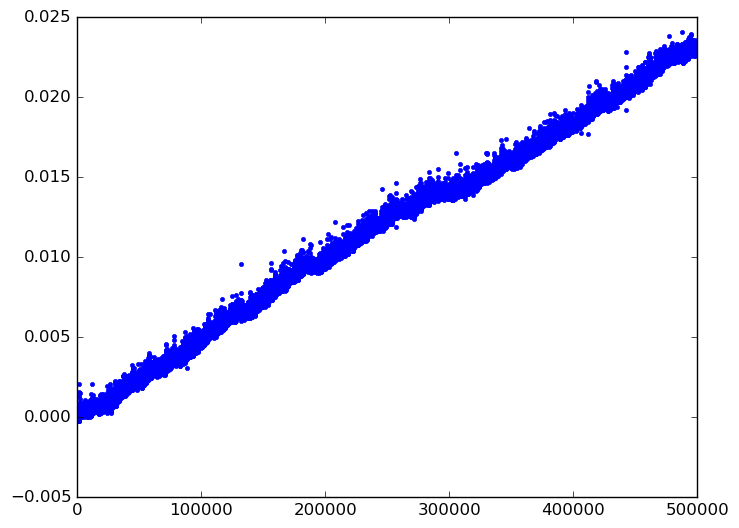

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9c5c3bb850>

In [13]:
plot(I-I[1],".")

## Invariant geométrico

In [9]:
qg = gtrajec[:,2]
pg = gtrajec[:,3]
zg = gtrajec[:,4]
vg = gtrajec[:,5];

In [10]:
Ag =  [potential.f(x) for x in qg] + pg.^2/2.
Ig = Ag - [log(thermo.distribution(k)) for k in zg]./(1./T) + vg./(1./T)

500001-element Array{Float64,1}:
 1.50793
 1.50794
 1.50794
 1.50794
 1.50795
 1.50795
 1.50795
 1.50795
 1.50795
 1.50795
 1.50795
 1.50795
 1.50795
 ⋮      
 1.50811
 1.50811
 1.5081 
 1.5081 
 1.5081 
 1.5081 
 1.5081 
 1.50811
 1.50811
 1.50811
 1.50811
 1.50811

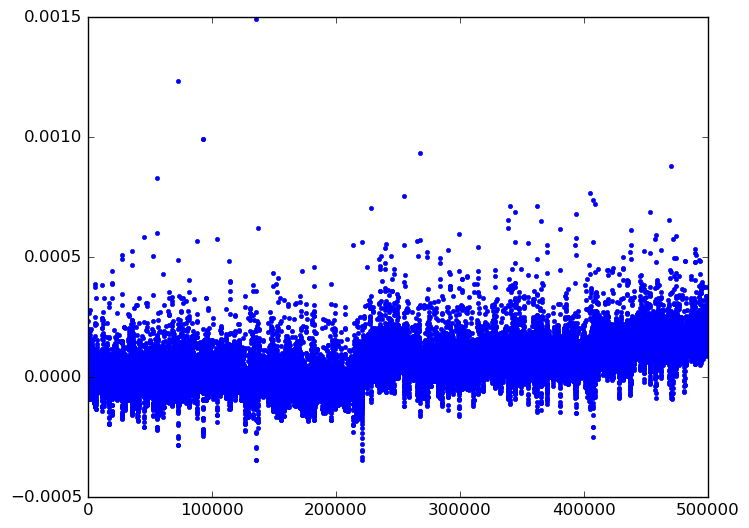

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5b2f562850>

In [13]:
plot(Ig - Ig[1],".")

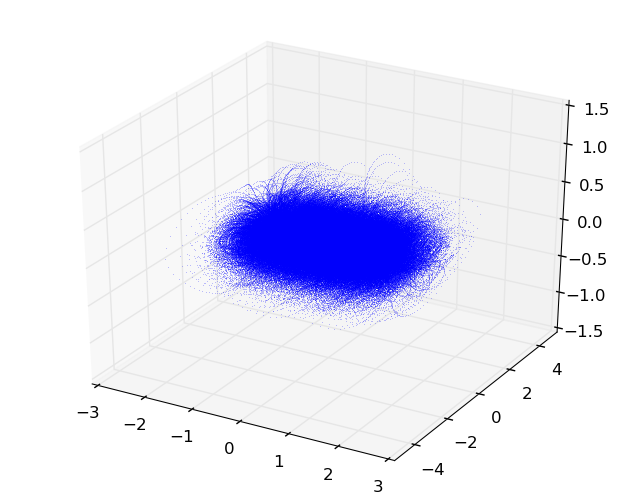

In [14]:
plot3D(gtrajec[:,2], gtrajec[:,3], gtrajec[:,4], ".", ms = 0.5, alpha = 0.3);

You may save the trajectory in an .hdf5 file with the command `save_trajectory`

## Poincaré sections

In [15]:
zsection = geometricsection(gtrajec, parameters, "z")

15210×5 Array{Float64,2}:
    0.750937   0.68901    -2.17533   -5.75577e-13   0.0019263
    1.59219    0.0275468  -2.15138   -4.16636e-13   0.110066 
    2.43013   -0.632743   -2.16352   -9.92694e-13   0.0438024
    3.37017   -0.621421    2.80596   -8.83149e-13  -1.54943  
    4.47752    0.0855939   2.76457   -1.06717e-13  -1.39704  
    5.64884    0.808171    3.02198   -9.55528e-13  -2.24795  
    6.57063    0.814691   -1.81705   -2.27739e-13   0.66329  
    7.30985    0.165162   -1.78833   -6.62354e-13   0.825016 
    8.03736   -0.47789    -1.78558   -5.18895e-13   0.817072 
    8.81491   -1.1432     -1.98212   -6.87199e-13   0.0328531
    9.45593   -1.14331     1.95766   -2.24853e-13   0.0808916
   10.2281    -0.478669    1.76926   -5.09265e-13   0.84599  
   10.9518     0.16386     1.77207   -9.86058e-13   0.853957 
    ⋮                                                        
 6240.56      -0.0199832   0.206424   7.05964e-13   2.40311  
 6241.4        0.632642    0.17128    3.1681

The generated array has the same structure than the array generated by the function `trajectory`

In [16]:
psection = geometricsection(gtrajec, parameters, "p")

1939×5 Array{Float64,2}:
    2.96546  -0.944567  -5.62215e-13  -0.135321     1.79863 
    9.13389  -1.39537   -7.22423e-13   0.00357148   1.47617 
   15.4056   -0.970564  -7.62052e-13   0.171326     1.54394 
   21.2643   -1.13814   -3.36437e-13   0.282985     0.446502
   27.5554   -1.12971   -4.45431e-13  -0.211723     1.0588  
   33.1921   -1.02675   -4.64228e-13  -0.0072306    2.1451  
   38.7482   -1.09653   -7.9658e-13    0.160914     1.47523 
   45.3986   -1.67168   -7.45786e-13   0.0576316    0.39001 
   52.2494   -1.15684   -2.36654e-13   0.0409044    1.93496 
   59.071    -1.82549   -8.25284e-13   0.213991    -1.32814 
   66.8715   -1.32108   -7.87351e-13  -0.269191     0.226018
   72.37     -0.827234  -7.38664e-13   0.299289     0.602723
   78.3892   -1.40265   -8.46734e-13   0.0938938    1.2438  
    ⋮                                                       
 6179.08      1.62643    4.2089e-13   -0.286492    -0.914453
 6185.63      1.09631    7.5904e-13    0.253162     0.764896

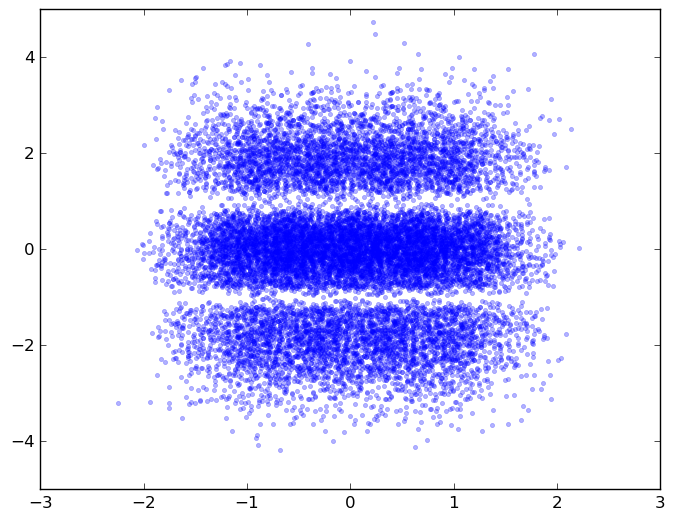

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5b2bb89290>

In [17]:
plot(zsection[:,2], zsection[:,3], ".", alpha = 0.3)

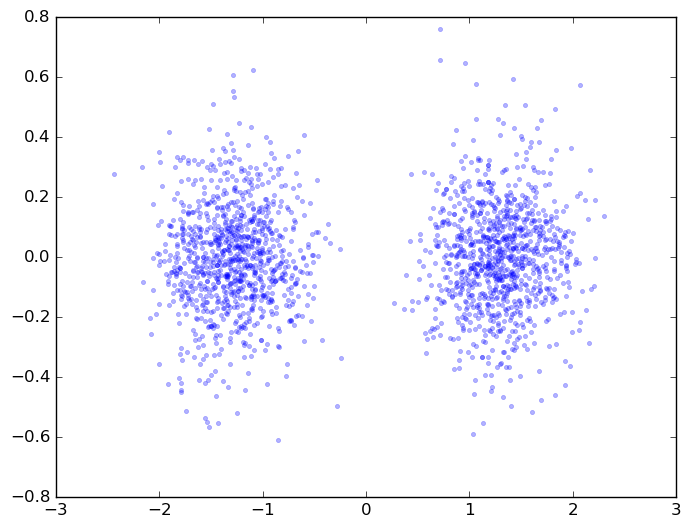

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5b2babe690>

In [18]:
plot(psection[:,2], psection[:,4], ".", alpha = 0.3)

## Marginal distributions

The normalization factor $Z$ corresponds to the configurational partition function, i.e.
    
$$ \rho(q) = \frac{e^{-\beta V(q)}}{Z} $$

$$ Z = \int_{-\infty}^{\infty} e^{-\beta V(q)} $$

For the quartic potential with $\beta = 1.0$, $Z = 2.563693352$

In [19]:
Z = 2.563693352
data_marg = marginaldistributions(gtrajec[:,1:4], parameters, Z)

500001×6 Array{Float64,2}:
 0.910911  0.328383   0.950966  0.253826  0.309792   0.413275
 0.922087  0.32557    0.839326  0.280503  0.307298   0.422789
 0.931944  0.323023   0.739696  0.303457  0.302581   0.44132 
 0.940624  0.32073    0.650899  0.322784  0.296118   0.467891
 0.948256  0.318675   0.571826  0.338771  0.288285   0.501981
 0.954956  0.31684    0.501455  0.351809  0.279381   0.54335 
 0.960825  0.31521    0.438851  0.362318  0.269641   0.591931
 0.965955  0.313767   0.383163  0.370706  0.25925    0.647752
 0.970429  0.312496   0.333623  0.377347  0.248354   0.710879
 0.974318  0.311381   0.289539  0.382566  0.237066   0.781377
 0.977687  0.310407   0.250288  0.38664   0.225476   0.859259
 0.980593  0.309561   0.215308  0.389802  0.213653   0.94446 
 0.983085  0.308832   0.184097  0.392239  0.201651   1.03679 
 ⋮                                                   ⋮       
 0.336541  0.388813  -1.3726    0.155524  0.0645339  2.25677 
 0.319727  0.389045  -1.31671   0.167664  0

The data is saved in the format
$$q \quad \rho(q) \quad p \quad \rho(p) \quad \zeta \quad \rho(\zeta)  $$

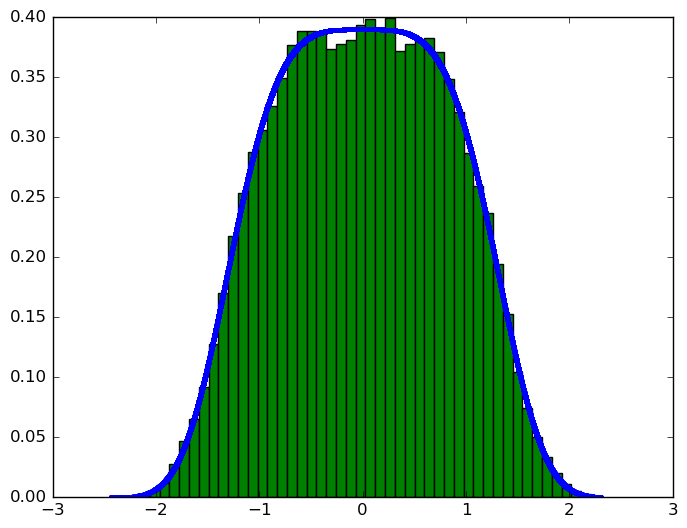

In [20]:
plot(data_marg[:,1], data_marg[:,2], ".", lw = 0.2)
plt[:hist](data_marg[:,1], 50, normed = true);

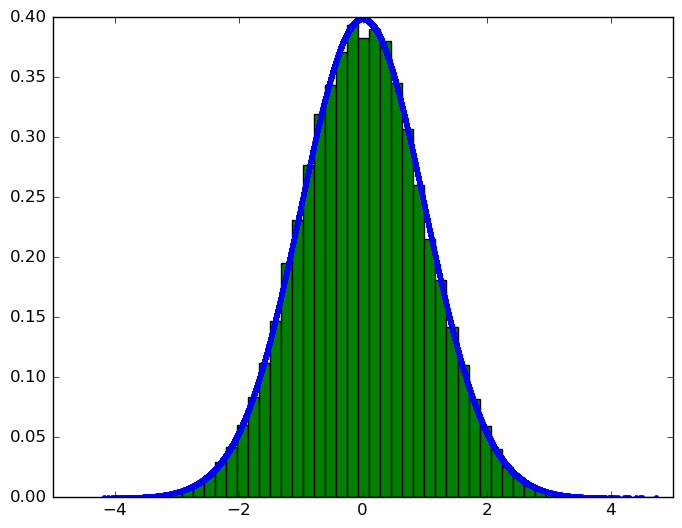

In [21]:
plot(data_marg[:,3], data_marg[:,4], ".", lw = 0.2)
plt[:hist](data_marg[:,3], 50, normed = true);

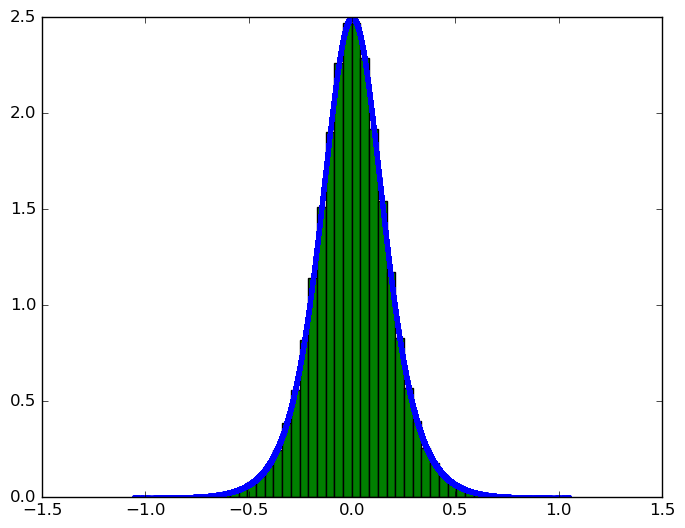

In [22]:
plot(data_marg[:,5], data_marg[:,6], ".", lw = 0.2)
plt[:hist](data_marg[:,5], 50, normed = true);

As long as the trajectory is increased, the correspondence between the histogram and the theoretical marginal distribution improves

## Hellinger distance

In [28]:
?hellingerdistance

search: hellingerdistance



This function returns the hellinger distance calculated in n (10 by default) different intervals of a trajectory together with its error. The normalization factor associated with the distribution in `q` is passed as an argument. Example:

```
julia> hellingerdistance(data, parameters, normalizationfactor, n)
```


In [30]:
data_hell = hellingerdistance(gtrajec, parameters, Z)

1
2
3
4
5
6
7
8
9
10


10×3 Array{Float64,2}:
  623.75  0.0720124  0.000718324
 1248.75  0.0416994  0.000415872
 1873.75  0.0412113  0.000411221
 2498.75  0.0384598  0.000383614
 3123.75  0.0336013  0.000335887
 3748.75  0.030504   0.000304806
 4373.75  0.0277872  0.000277581
 4998.75  0.0270775  0.000270175
 5623.75  0.0256004  0.000255792
 6248.75  0.0247179  0.000246681

The data is returned in the format $$time \quad hellinger \quad error $$

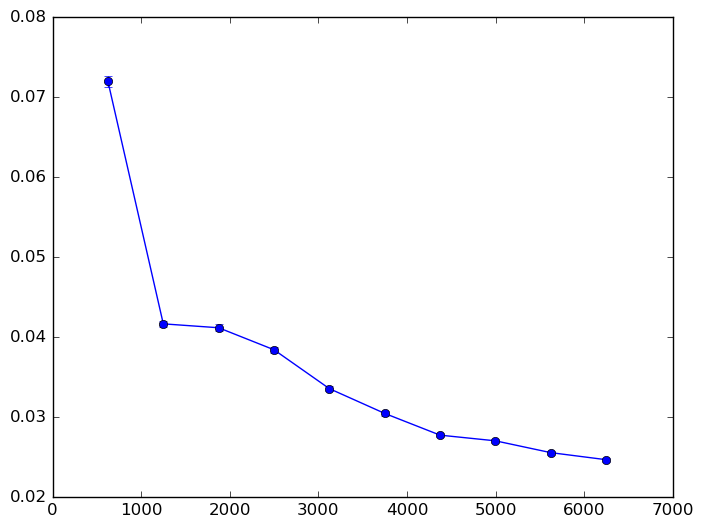

In [31]:
plt[:errorbar](data_hell[:,1], data_hell[:,2], yerr = data_hell[:,3], fmt = "o-");

As long as the trajectory is increased, the correspondence between the histogram and the theoretical marginal distribution improves

## Other thermostats

Consider, for instance, the Nosé-Hoover thermostat. In the density dynamics formalism it is given by

In [32]:
thermo = Thermostat("Nose-Hoover", x-> 1.0 / sqrt(T*2*pi*Q) *exp(-x^2./(T*2*Q))) 

ThermostattedDynamics.Thermostat{##9#10}("Nose-Hoover",#9)

In [33]:
parameters.thermo = thermo
parameters.potential = Potential("Harmonic", x->x^2./2.0)

ThermostattedDynamics.Potential{##11#12}("Harmonic",#11)

In [34]:
trajNH = trajectory(parameters)

Part 1 done
Part 2 done
Part 3 done
Part 4 done
Part 5 done
Part 6 done
Part 7 done
Part 8 done
Part 9 done
Part 10 done
Part 11 done
Part 12 done
Part 13 done
Part 14 done
Part 15 done
Part 16 done
Part 17 done
Part 18 done
Part 19 done
Part 20 done
Part 21 done
Part 22 done
Part 23 done
Part 24 done
Part 25 done
Part 26 done
Part 27 done
Part 28 done
Part 29 done
Part 30 done
Part 31 done
Part 32 done
Part 33 done
Part 34 done
Part 35 done
Part 36 done
Part 37 done
Part 38 done
Part 39 done
Part 40 done
Part 41 done
Part 42 done
Part 43 done
Part 44 done
Part 45 done
Part 46 done
Part 47 done
Part 48 done
Part 49 done
Part 50 done


500001×5 Array{Float64,2}:
    0.0     -0.41201   -0.406081   0.000382505   0.0        
    0.0125  -0.417054  -0.401143  -0.0100816    -0.000605688
    0.025   -0.42204   -0.396662  -0.0205929    -0.00252247 
    0.0375  -0.426973  -0.392626  -0.031146     -0.00575776 
    0.05    -0.431858  -0.38903   -0.0417363    -0.0103156  
    0.0625  -0.436701  -0.385873  -0.0523596    -0.016199   
    0.075   -0.441507  -0.383153  -0.0630115    -0.0234108  
    0.0875  -0.446282  -0.380869  -0.0736876    -0.0319539  
    0.1     -0.451031  -0.37902   -0.0843837    -0.0418312  
    0.1125  -0.45576   -0.377604  -0.0950954    -0.0530457  
    0.125   -0.460473  -0.376619  -0.105818     -0.0656001  
    0.1375  -0.465177  -0.376064  -0.116549     -0.0794976  
    0.15    -0.469876  -0.37594   -0.127283     -0.09474    
    ⋮                                                       
 6249.86     0.369994   0.249743  -0.0364748     0.0596551  
 6249.88     0.373095   0.246416  -0.0482062     0.0543638

In [35]:
zsNH = section(trajNH, parameters, "z")

7281×5 Array{Float64,2}:
    0.906708  -1.17175    -1.96352    -9.09158e-14  -2.4469   
    2.12362   -1.16936     1.83926    -5.544e-13    -2.20781  
    3.72745    0.263081    1.54041    -5.09459e-13  -1.05371  
    5.47467    1.60726     2.84332    -4.51449e-13  -5.16653  
    6.60895    1.70338    -1.08014    -2.41474e-13  -1.86678  
    8.32357    0.0197306  -1.14561    -7.37134e-13  -0.48908  
   10.0579    -1.68456    -1.05909    -5.22206e-13  -1.81237  
   11.2023    -1.58669     2.89023    -7.83423e-13  -5.26818  
   12.963     -0.245198    1.55372    -2.88158e-13  -1.0698   
   14.5705     1.18045     1.87917    -1.77618e-13  -2.29511  
   15.784      1.18117    -1.91892    -3.83576e-13  -2.37141  
   17.3964    -0.237647   -1.57122    -9.2288e-13   -1.09532  
   19.2079    -1.57109    -3.09305    -6.833e-13    -5.8504   
    ⋮                                                         
 6233.31       1.62078    -0.688387    4.08381e-13  -1.38443  
 6234.61       0.362651   -0.7

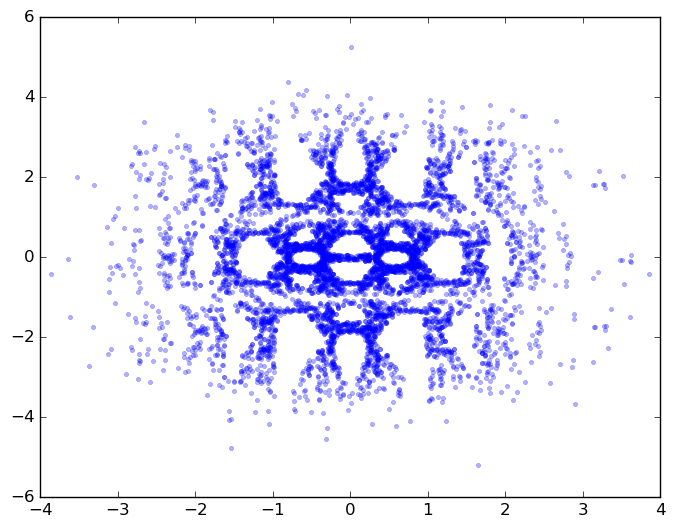

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdc57266550>

In [36]:
plot(zsNH[:,2],zsNH[:,3], ".", alpha = 0.3)